### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [1]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

Ejercicio 1: describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

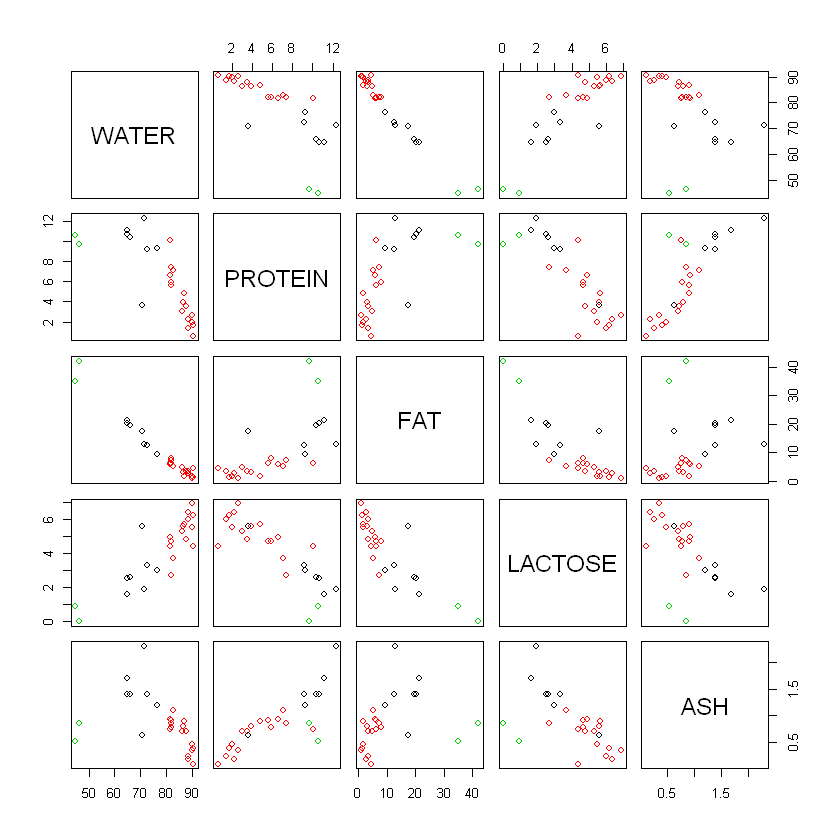

In [2]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

<b>Al graficar los datos se puede notar que se grafican los datos con colores segun la cantidad de grupos, los ejes x e y estan segun los tipos de componentes en la identidad de la matriz</b>

Ejercicio 2: Interprete y comente los resultados obtenidos. 

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
2,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841
3,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957


K-means clustering with 3 clusters of sizes 7, 16, 2

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 69.47143  9.514286 16.28571 2.928571 1.432857
2 86.06250  4.275000  4.17500 5.118750 0.635625
3 45.65000 10.150000 38.45000 0.450000 0.690000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          2          2          2          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          2          1          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          3          3 

Within cluster sum of squares by cluster:
[1] 299.9911 377.2215  27.1912
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

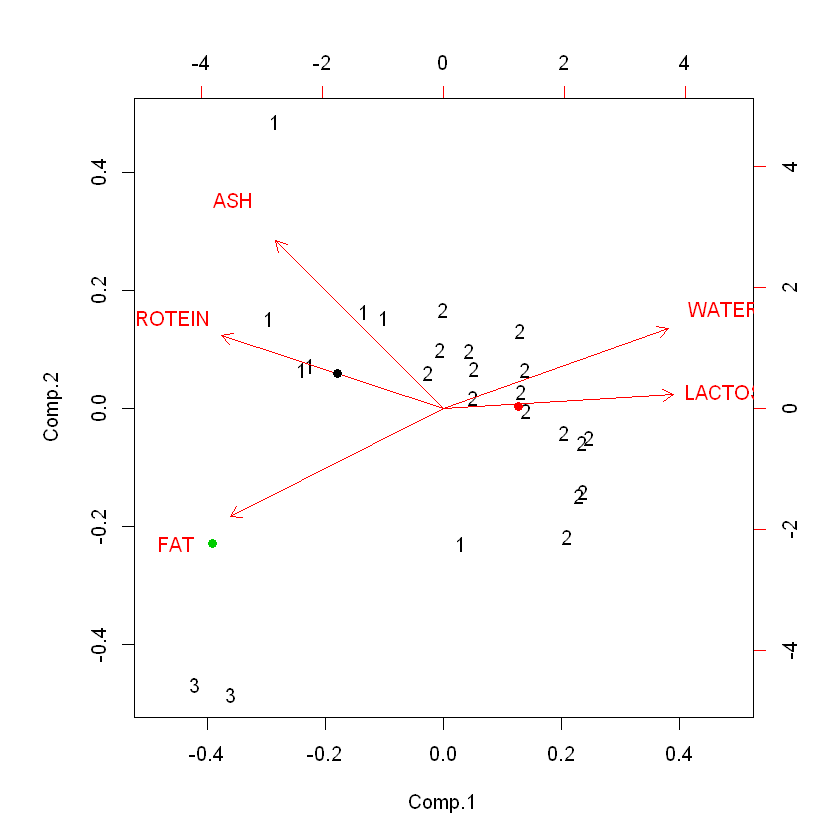

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


<b>R: Se crean tres grupos con los datos mas influyentes cada uno, los grupos con mayor agua lactosa, grupo de grasa grupo de minerales y proteina</b>

Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003
2,-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632


K-means clustering with 2 clusters of sizes 17, 8

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 85.48824 4.570588  4.488235 4.994118 0.6688235
2 62.66250 9.700000 22.675000 2.300000 1.2762500

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2 

Within cluster sum of squares by cluster:
[1]  521.8994 1664.9235
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

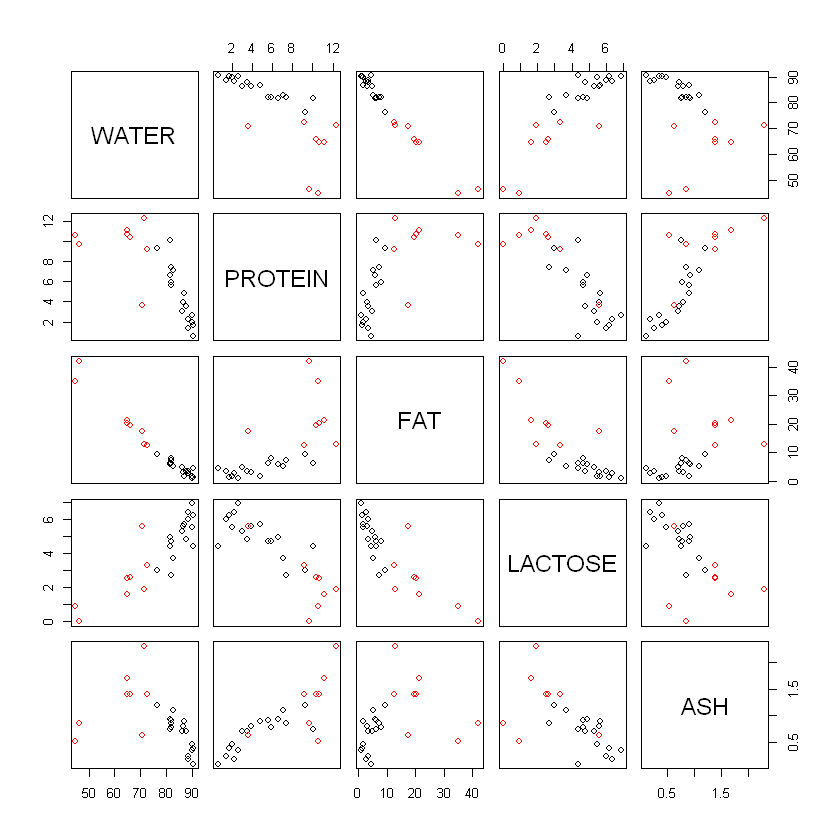

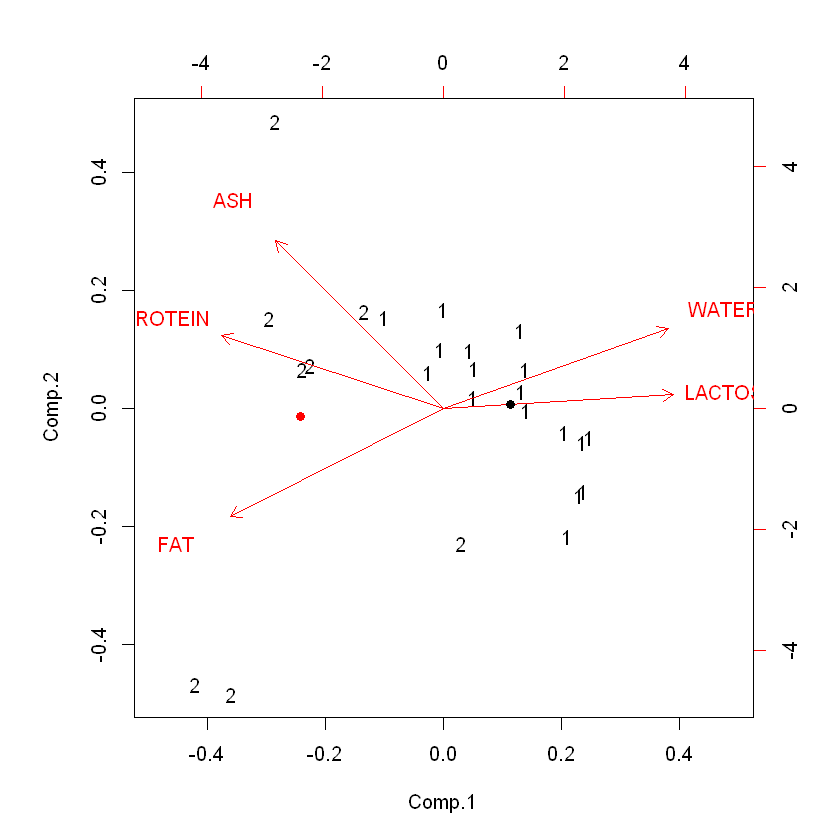

In [4]:

k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595
2,-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957
3,-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768
4,1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286


K-means clustering with 4 clusters of sizes 7, 2, 6, 10

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 81.18571  7.428571  6.90000 4.014286 0.9314286
2 45.65000 10.150000 38.45000 0.450000 0.6900000
3 68.33333  9.550000 17.41667 2.916667 1.4716667
4 88.50000  2.570000  2.80000 5.680000 0.4850000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         4          4          4          4          4          4          4 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          4          4          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         4          1          1          3          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          2          2 

Within cluster sum of squares by cluster:
[1]  63.53491  27.19120 191.74708  59.41225
 (between_SS / tot

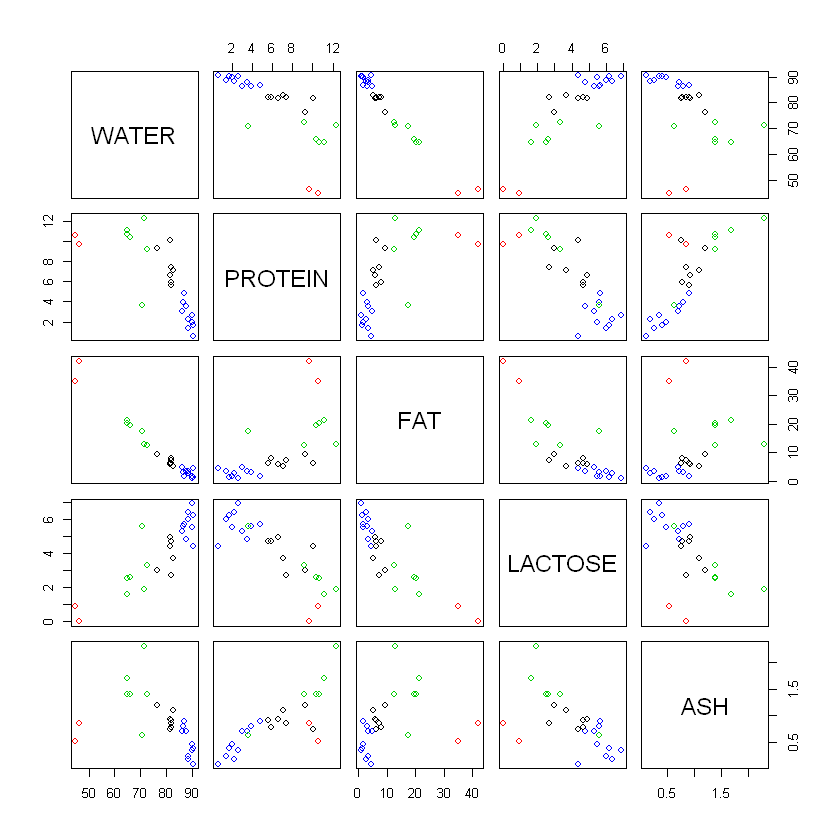

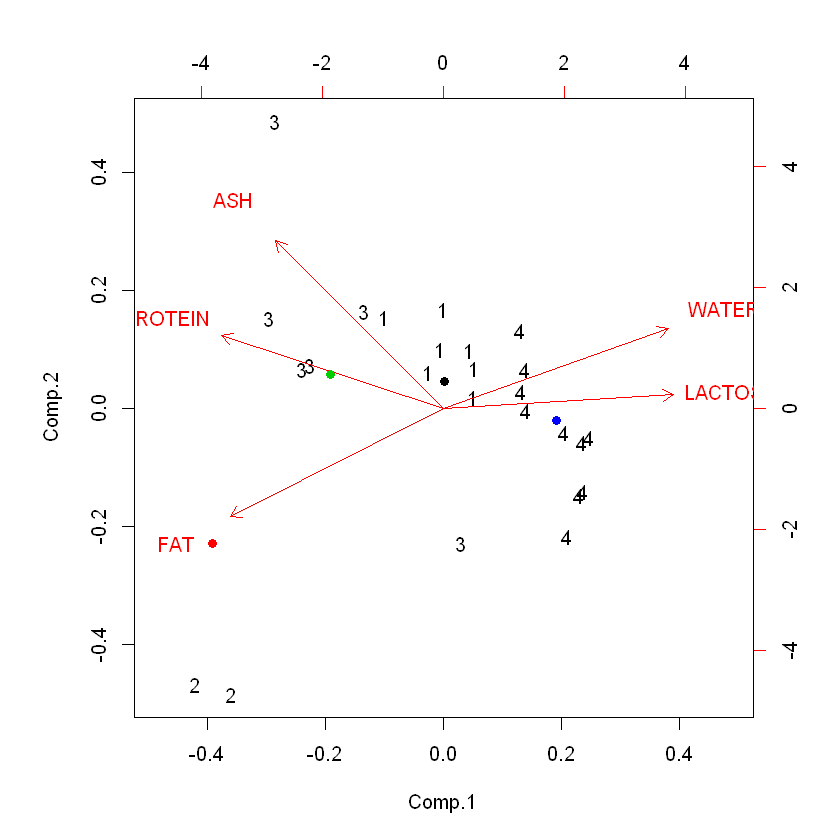

In [5]:
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

<b>R: Dependiendo del k se crean grupos segun la cantidad de este diviendo los datos, por ejemplo en k2 se crea el grupo agua/lactosa y ceniza proteina.

[1] 61.33612
[1] 11


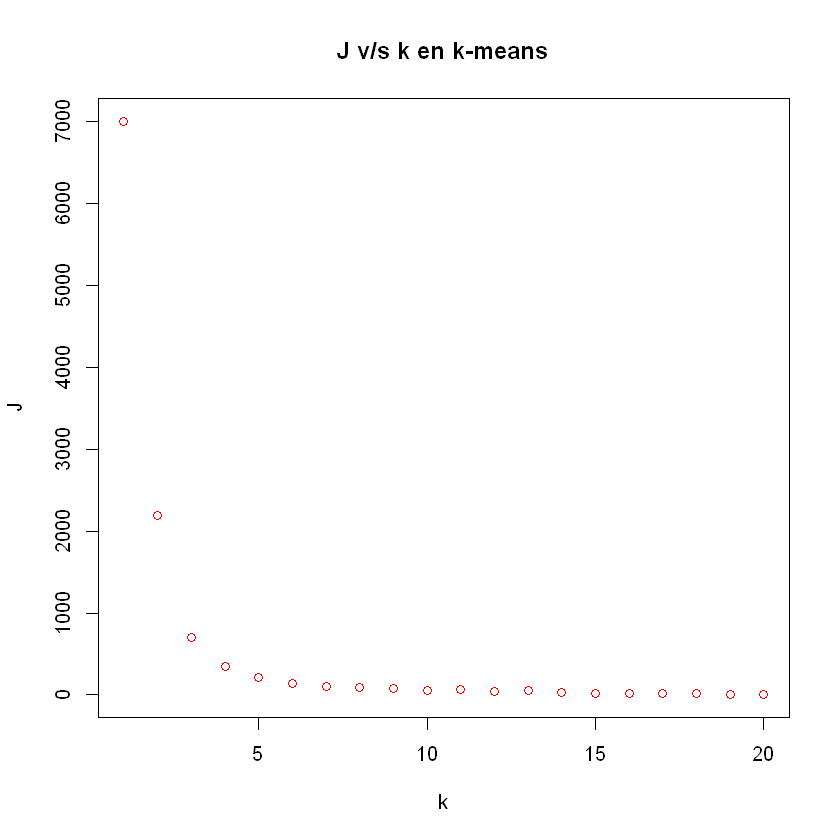

In [25]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20
pmin<-0
kreal<-0
for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
    if (k > 1 & pmin==0) {
        if(J[k-1]-J[k]-4 < 0) {
            pmin<-J[k] 
            kreal<-k}}
}

print(pmin)
print(kreal)
plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

Ejercicio 4: de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.

In [27]:
sprintf("K: %i y el valor de la funcion de perdida asociada al k J[k]: %f",kreal,pmin)


[1] "K: 11 y el valor de la funcion de perdida asociada al k J[k]: 61.336120"

Ejercicio 5: Realice un análisis de clustering con el conjunto de datos DatosUsoFacebook.csv
Interprete sus resultados.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16
1,-1.3897098,-1.2344818,-0.5961507,0.06507169,0.99596293,-0.22469748,0.4890922,0.088937756,0.17854788,0.06492444,-0.16240107,0.08073686,-0.35204969,-0.001709759,-0.13691482,-0.06523796
2,0.2321171,1.2068088,0.4539833,-0.24678735,0.29323432,0.19231675,0.4391210,0.006548467,-0.02080341,-0.05424554,-0.06905690,-0.08602444,0.02701721,-0.080276779,-0.10125849,-0.07075686
3,2.0830069,-0.5876838,0.1277608,0.22748401,-0.04844887,-0.13239516,-0.1608245,0.089489515,0.13683867,-0.12100099,0.10295905,0.11720367,-0.16020492,0.011770480,0.07197697,-0.06113097
4,-2.0994209,-0.2166317,1.3675379,-0.14027722,-0.58880828,-0.07688106,-0.3721754,-0.304283920,-0.03538516,-0.29098038,0.22014829,-0.29158522,0.15402808,0.137549966,0.11968366,0.01816591
5,-0.3404923,0.1288364,-1.0841300,0.09450529,-0.64111046,0.10600547,-0.4790767,0.013355973,-0.22270312,0.32199915,-0.04423615,0.09467497,0.28924082,0.005917363,0.06968647,0.18581186


K-means clustering with 5 clusters of sizes 28, 50, 44, 24, 41

Cluster means:
        R1       R2       R3       R4       R5       R6       R7       R8
1 2.071429 1.857143 1.964286 2.142857 1.142857 3.035714 2.642857 2.214286
2 3.040000 2.880000 2.660000 2.480000 1.260000 1.780000 2.360000 3.000000
3 2.840909 2.909091 2.909091 2.272727 1.659091 1.772727 2.750000 2.931818
4 2.250000 2.375000 1.500000 1.666667 1.000000 1.250000 1.541667 1.750000
5 2.170732 2.585366 2.902439 2.414634 1.463415 1.707317 2.292683 2.707317
        R9      R10      R11      R12      R13      R14      R15      R16
1 1.321429 2.250000 3.607143 1.750000 2.571429 1.357143 1.285714 1.214286
2 1.280000 1.920000 3.060000 1.440000 1.640000 1.160000 1.800000 1.260000
3 1.795455 1.977273 2.818182 2.522727 2.840909 1.659091 2.272727 1.818182
4 1.250000 2.041667 3.666667 1.541667 1.916667 1.083333 1.416667 1.000000
5 1.195122 1.731707 3.609756 1.390244 3.341463 1.317073 1.487805 1.146341

Clustering vector:
  [1] 1 4 1 5

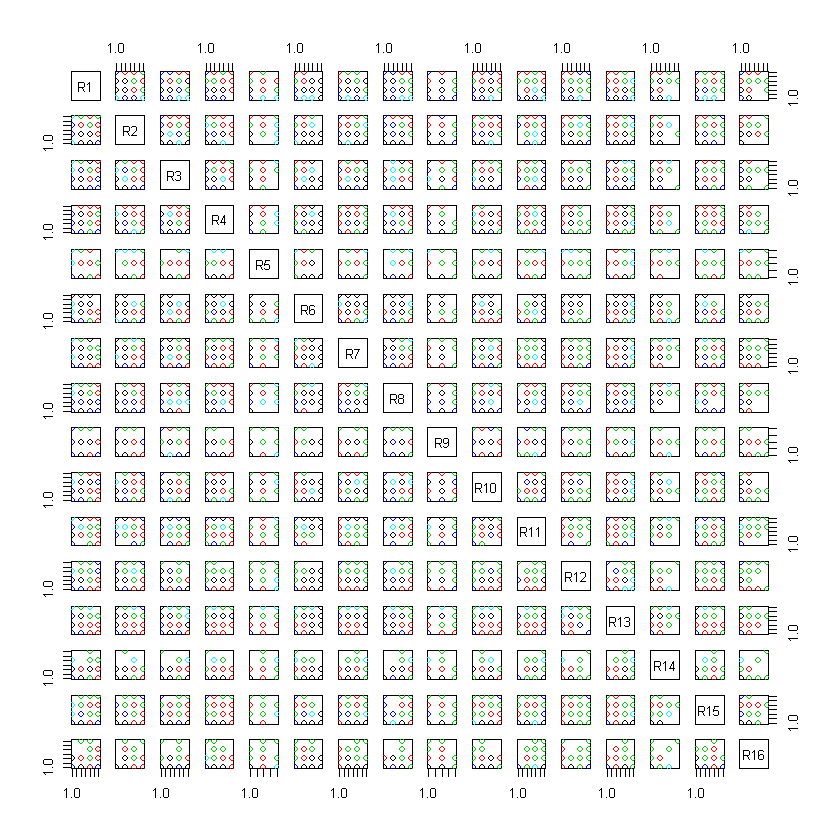

Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"

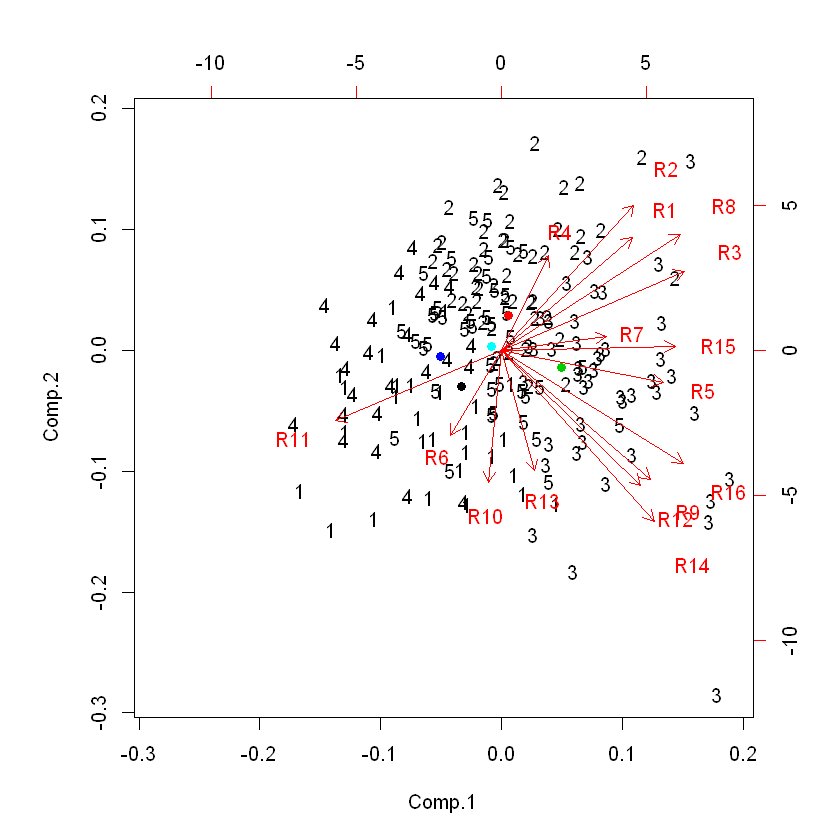

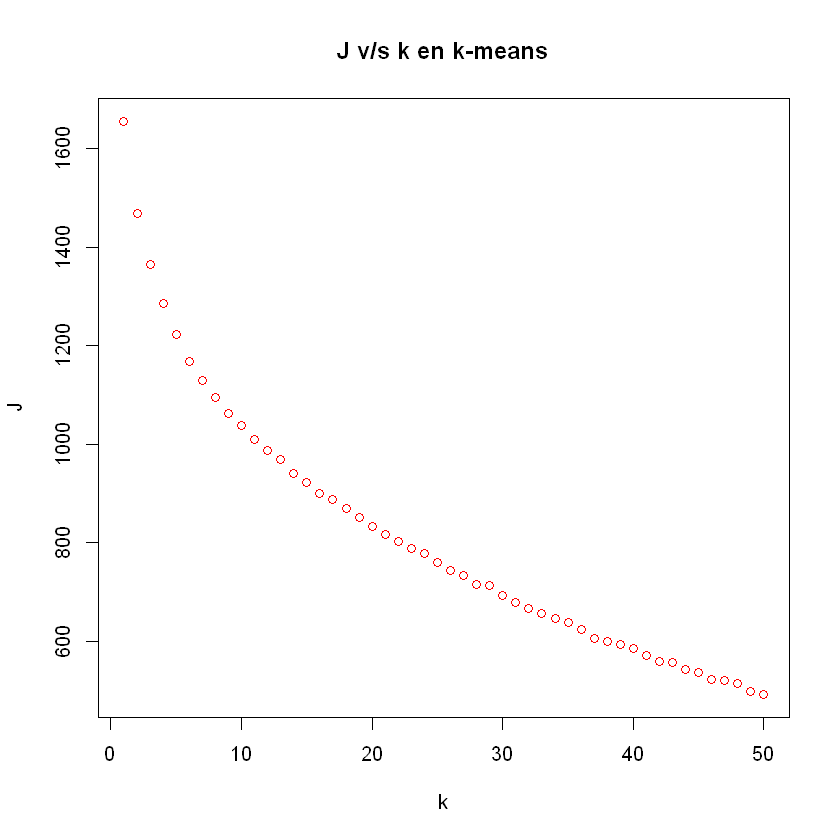

In [35]:
library(cluster)
library(ggplot2)

datos <-read.csv("DatosUsoFacebook.csv",header=TRUE,sep=";")

k0=5
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)
J<-rep(0,50)
fin_iter<-50
pmin<-0
kreal<-0
for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
    if (k > 1 & pmin==0) {
        if(J[k-1]-J[k]-4 < 0) {
            pmin<-J[k] 
            kreal<-k}}
}

plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

In [36]:
sprintf("K: %i y el valor de la funcion de perdida asociada al k J[k]: %f",kreal,pmin)

[1] "K: 29 y el valor de la funcion de perdida asociada al k J[k]: 714.507703"

<b> R: Segun los parametros entregados, hay 16 componentes distintas (Ri , i=1,2...16) las cuales se trataron de agrupar en 5 grupos distintos, los datos son bastante dificiles de analizar debido a la gran cantidad de componentes, pero se puede notar que hay compontes que poseen comportamientos parecidos, por lo que no importan la cantidad de grupos que se hagan, siempre estaran relacionados con ese componente.</b>